In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('ggplot')


In [ ]:
df = pd.read_excel('Nvidia_stock_data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6775 non-null   datetime64[ns]
 1   Close   6775 non-null   float64       
 2   High    6775 non-null   float64       
 3   Low     6775 non-null   float64       
 4   Open    6775 non-null   float64       
 5   Volume  6775 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 317.7 KB


In [ ]:
df.head()

,Date,Close,High,Low,Open,Volume
0,1999-01-22,0.037605,0.044767,0.035575,0.040112,2714688000
1,1999-01-25,0.041545,0.042021,0.037605,0.040589,510480000
2,1999-01-26,0.038321,0.042857,0.037724,0.042021,343200000
3,1999-01-27,0.038202,0.039395,0.036291,0.038440,244368000
4,1999-01-28,0.038082,0.038440,0.037843,0.038202,227520000


In [ ]:
df.isnull().sum()


,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
df.dropna()

,Date,Close,High,Low,Open,Volume
0,1999-01-22,0.037605,0.044767,0.035575,0.040112,2714688000
1,1999-01-25,0.041545,0.042021,0.037605,0.040589,510480000
2,1999-01-26,0.038321,0.042857,0.037724,0.042021,343200000
3,1999-01-27,0.038202,0.039395,0.036291,0.038440,244368000
4,1999-01-28,0.038082,0.038440,0.037843,0.038202,227520000
...,...,...,...,...,...,...
6770,2025-12-19,180.990005,181.449997,176.339996,176.669998,324925900
6771,2025-12-22,183.690002,184.160004,182.350006,183.919998,129064400
6772,2025-12-23,189.210007,189.330002,182.899994,182.970001,174873600
6773,2025-12-24,188.610001,188.910004,186.589996,187.940002,65528500


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

Data Visualisation

<Axes: ylabel='Density'>

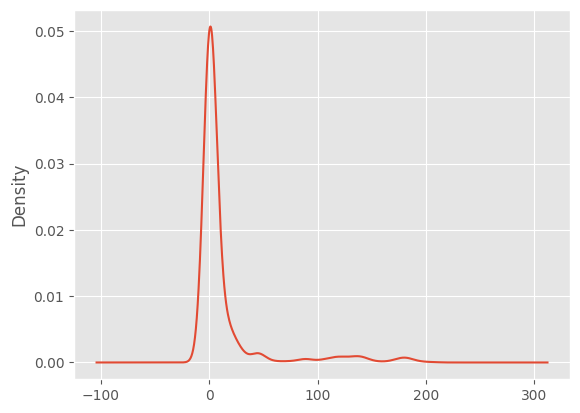

In [ ]:
df['Open'].plot(kind = 'kde')

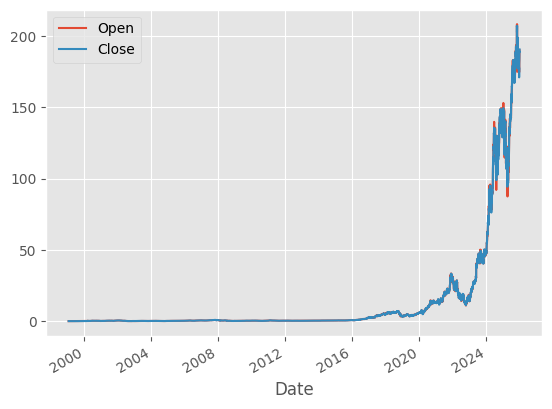

In [ ]:
df['Open'].plot()
df['Close'].plot()
plt.legend()

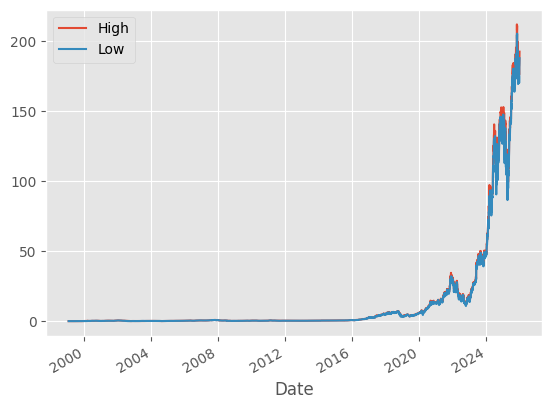

In [ ]:
df.High.plot()
df.Low.plot()
plt.legend()
plt.show()

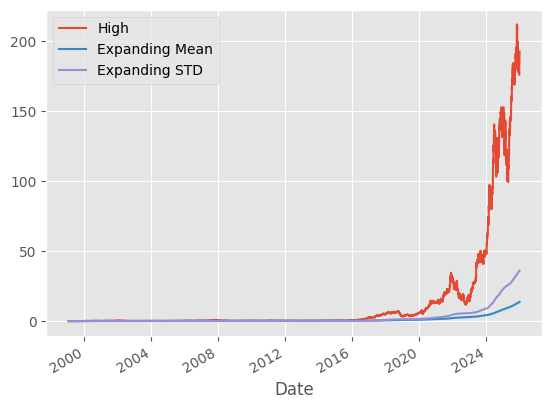

In [ ]:
stk_mean = df.High.expanding().mean()
stk_std = df.High.expanding().std()
df.High.plot()
stk_mean.plot()
stk_std.plot()
plt.legend(['High', 'Expanding Mean', 'Expanding STD'])
plt.show()

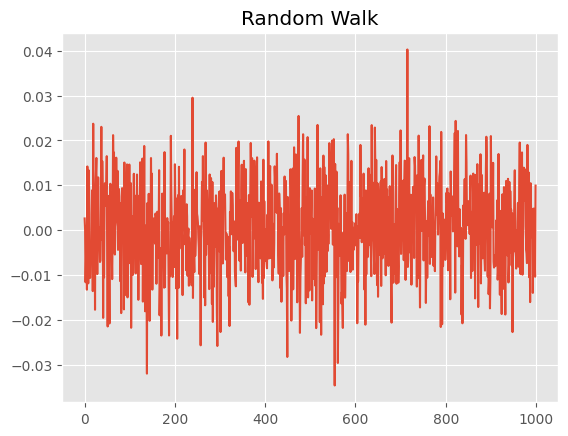

In [ ]:
from numpy.random import normal, seed
random_walk = normal(loc=0, scale = 0.01, size = 1000)
plt.plot(random_walk)
plt.title('Random Walk')
plt.show()

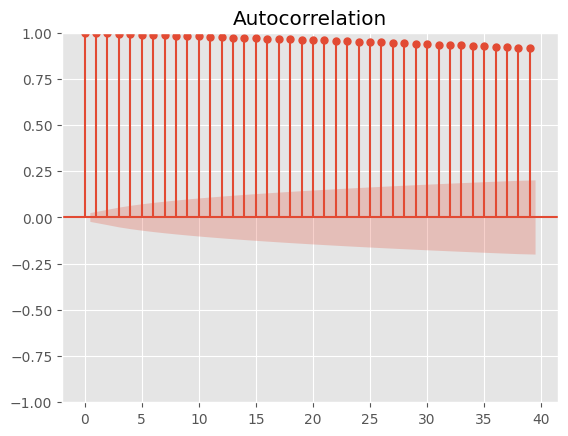

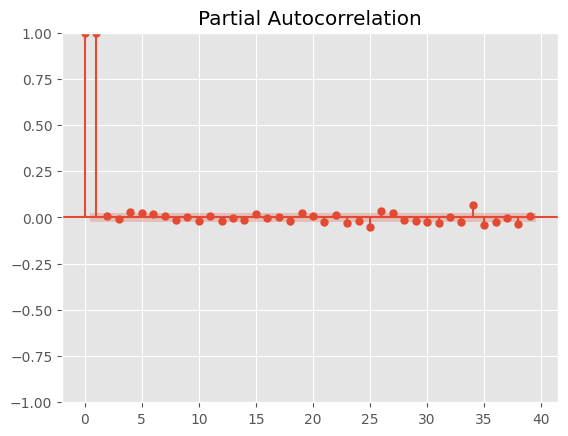

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['High'])
plot_pacf(df['High'])
plt.show()

In [ ]:
df.corr()

,Close,High,Low,Open,Volume
Close,1.000000,0.999838,0.999874,0.999678,-0.226051
High,0.999838,1.000000,0.999803,0.999881,-0.225309
Low,0.999874,0.999803,1.000000,0.999826,-0.226617
Open,0.999678,0.999881,0.999826,1.000000,-0.225797
Volume,-0.226051,-0.225309,-0.226617,-0.225797,1.000000


ADF Test on Price Level:
ADF Statistic: 4.152045861230121
p-value: 1.0



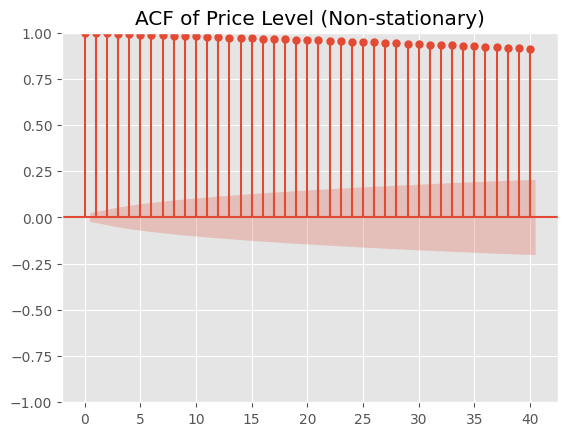

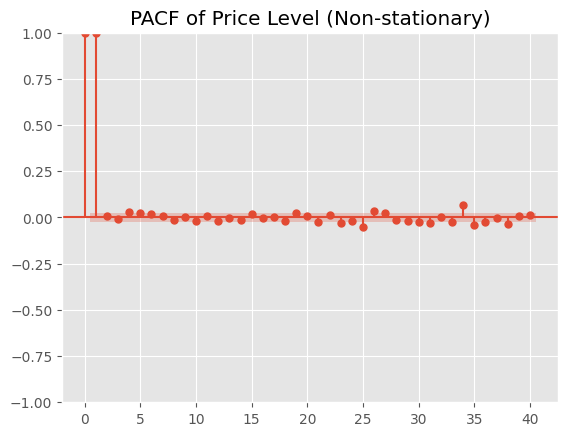

ADF Test on Log Returns:
ADF Statistic: -29.63799927416425
p-value: 0.0



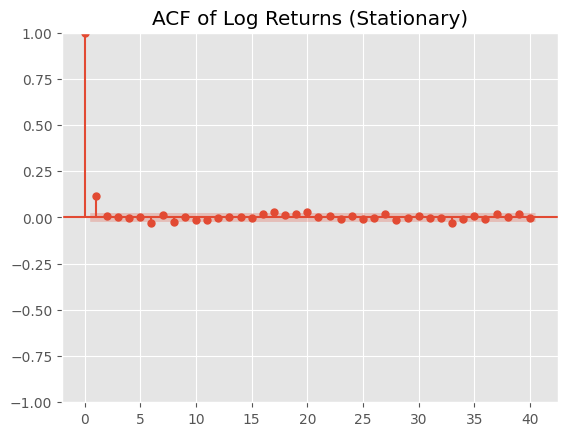

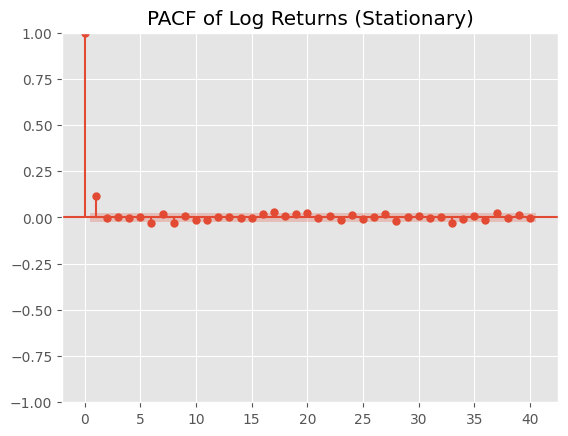

In [ ]:
from statsmodels.tsa.stattools import adfuller

series = df['High']

# ADF Test on price level
adf_price = adfuller(series)
print("ADF Test on Price Level:")
print(f"ADF Statistic: {adf_price[0]}")
print(f"p-value: {adf_price[1]}\n")

# Plot ACF & PACF (this is what you already saw)
plot_acf(series, lags=40)
plt.title("ACF of Price Level (Non-stationary)")
plt.show()

plot_pacf(series, lags=40, method='ywm')
plt.title("PACF of Price Level (Non-stationary)")
plt.show()

# FIX: LOG RETURNS (STATIONARY)

df['log_high'] = np.log(df['High'])
df['log_return'] = df['log_high'].diff()

# Drop missing values
returns = df['log_return'].dropna()


# ADF Test on Log Returns

adf_ret = adfuller(returns)
print("ADF Test on Log Returns:")
print(f"ADF Statistic: {adf_ret[0]}")
print(f"p-value: {adf_ret[1]}\n")


# CORRECT ACF & PACF

plot_acf(returns, lags=40)
plt.title("ACF of Log Returns (Stationary)")
plt.show()

plot_pacf(returns, lags=40, method='ywm')
plt.title("PACF of Log Returns (Stationary)")
plt.show()

In [ ]:
from statsmodels.tsa.api import ARIMA
aic_vals = []
for i in range(3):
    model = ARIMA(df['Open'], order =(0,i,0))
    result = model.fit()
    aic_vals.append(result.aic)
    if i == 0:
        continue

    print('At order =', i -1, 'AIC value = ', aic_vals[i-1])

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


At order = 0 AIC value =  67587.90664455591


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


At order = 1 AIC value =  21341.422094263547


In [ ]:
model = ARIMA(df['Open'], order = (0,1,0))
result = model.fit()
print(result.aic)

21341.422094263547


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
residuals = pd.DataFrame(result.resid)
residuals = residuals.iloc[1:]

In [ ]:
residuals.describe()

,0
count,6774.000000
mean,0.028031
std,1.168762
min,-23.563542
25%,-0.008252
50%,0.000468
75%,0.012377
max,16.347032


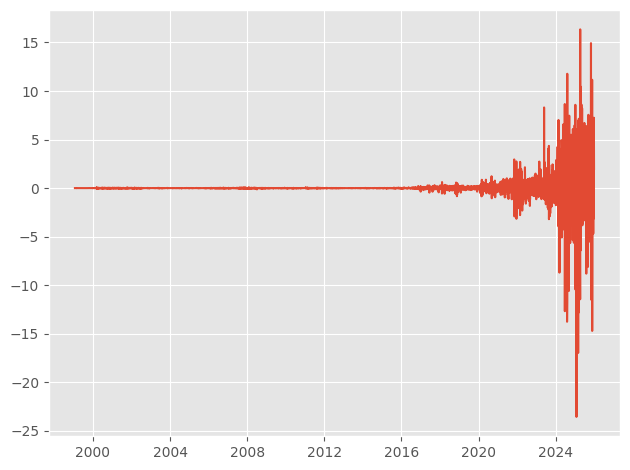

In [ ]:
plt.plot(residuals)
plt.tight_layout()
plt.show()

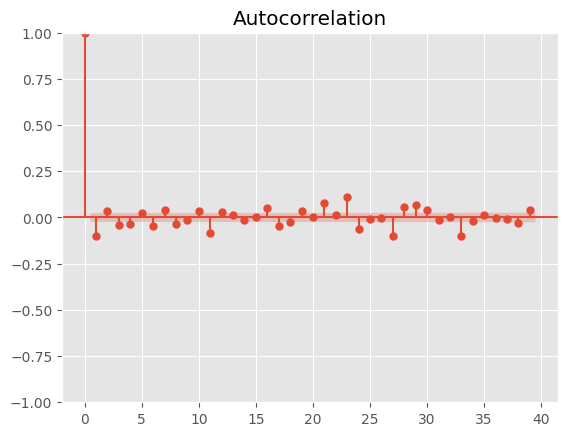

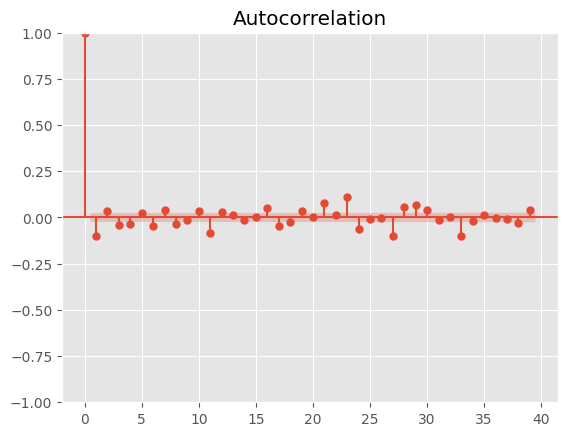

In [ ]:
plot_acf(residuals)

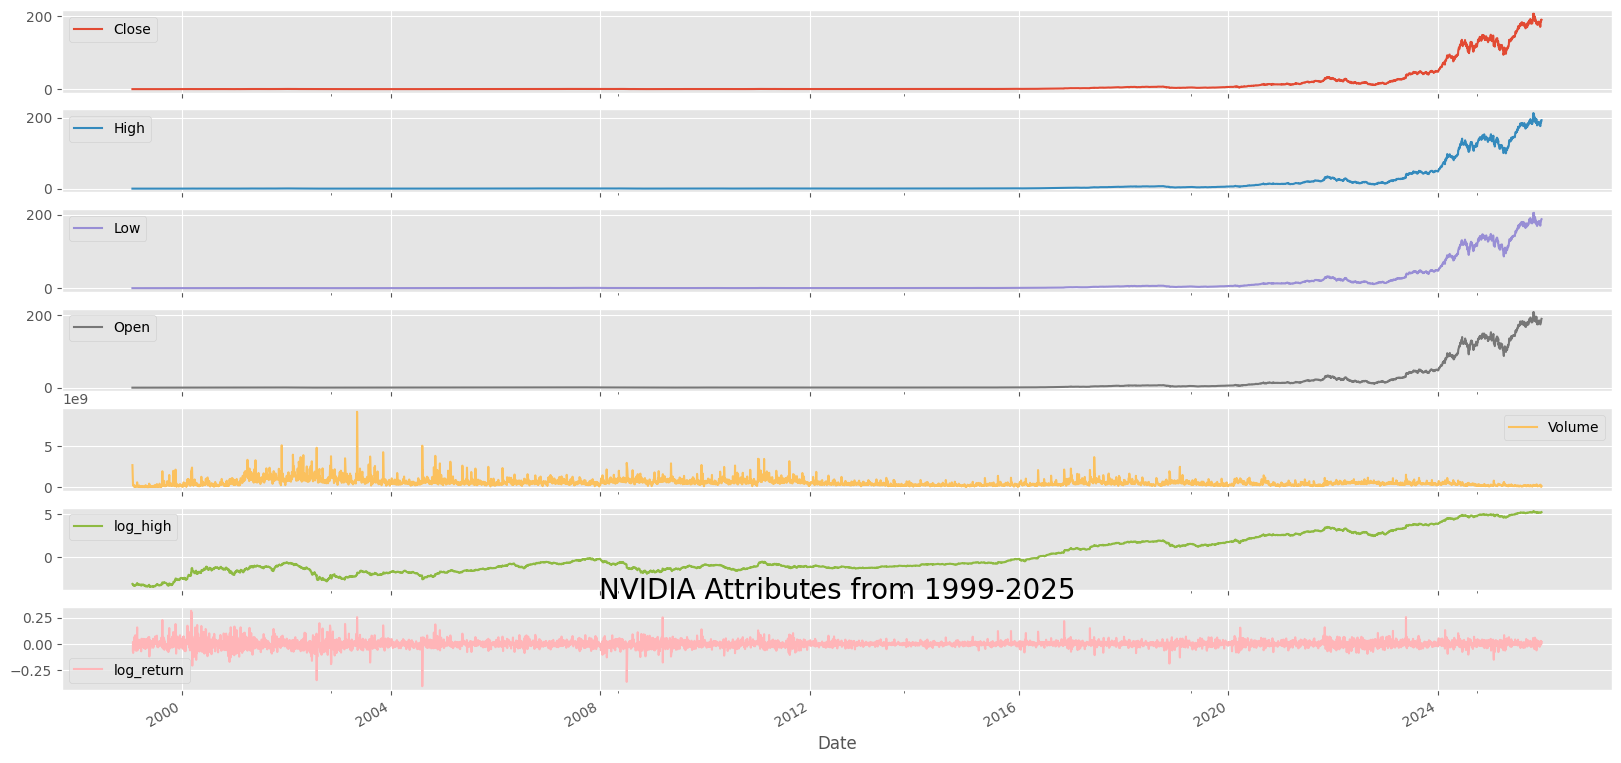

In [ ]:
df['1999':'2025'].plot(subplots = True, figsize = (20,10))
plt.title('NVIDIA Attributes from 1999-2025', fontsize = 20)
plt.show()

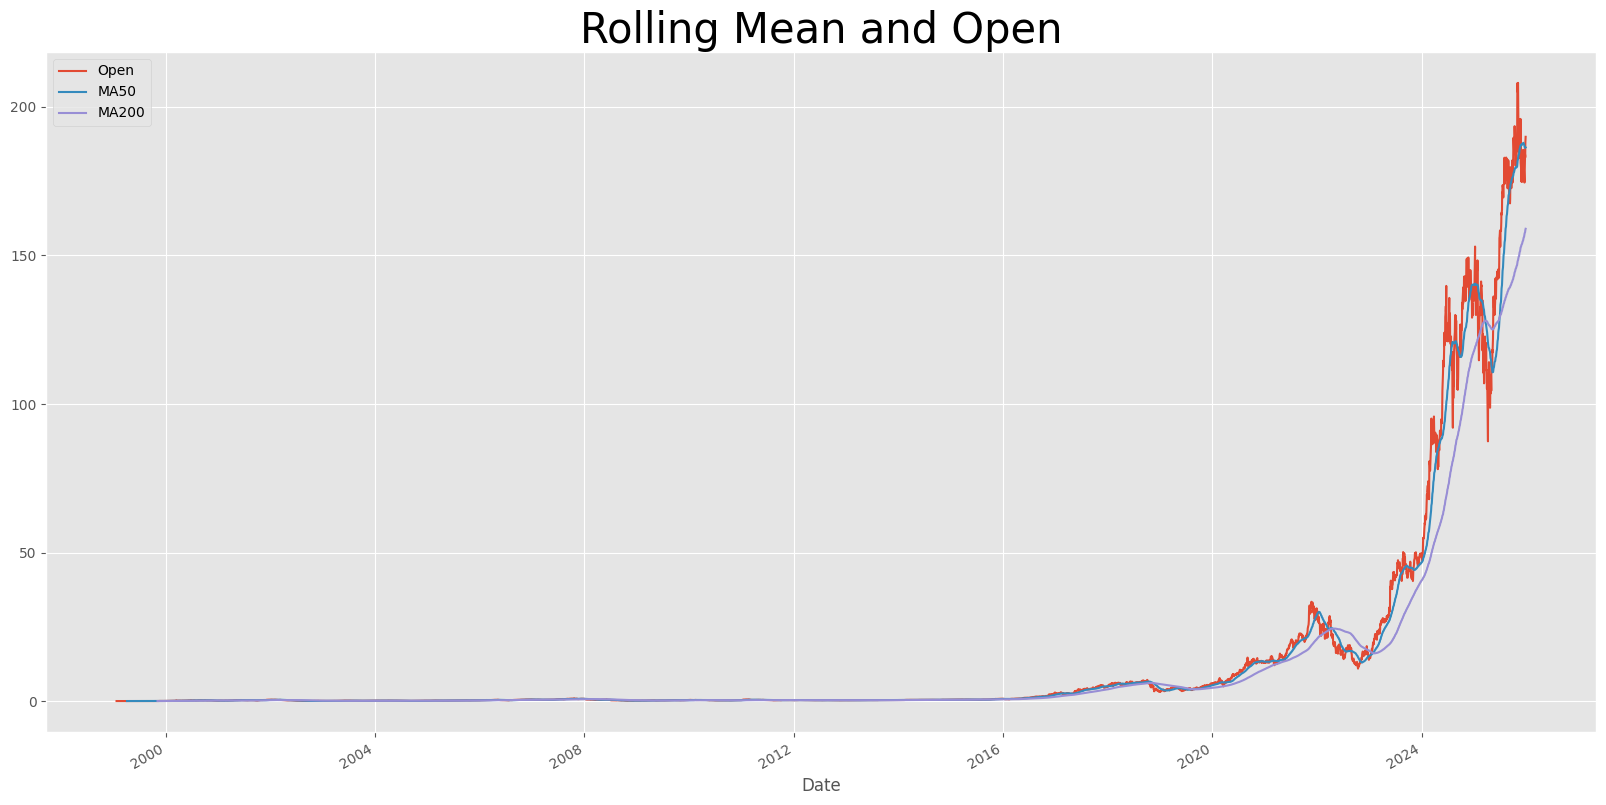

In [ ]:
df['MA50'] = df['Open'].rolling(50).mean()
df['MA200'] = df['Open'].rolling(200).mean()
df['Open'].plot(figsize = (20,10))
plt.title('Rolling Mean and Open', fontsize = 30)
df['MA50'].plot()
df['MA200'].plot()
plt.legend()

In [ ]:
periods = [5,25,75]
cols = []
for period in periods:
    col = "{} windows rate of return".format(period)
    df[col] = df['Open'].pct_change(period) * 100
    cols.append(col)

In [ ]:
df.dropna()

,Close,High,Low,Open,Volume,log_high,log_return,MA50,MA200,5 windows rate of return,25 windows rate of return,75 windows rate of return
Date,,,,,,,,,,,,
1999-11-04,0.055750,0.057183,0.053005,0.053005,1260336000,-2.861500,0.062452,0.044135,0.039399,28.325035,38.750066,33.736581
1999-11-05,0.053959,0.057780,0.051334,0.057302,616368000,-2.851116,0.010384,0.044326,0.039485,44.578835,58.416355,48.146412
1999-11-08,0.055512,0.057064,0.050617,0.052288,470016000,-2.863586,-0.012470,0.044412,0.039543,25.860140,38.606405,41.288267
1999-11-09,0.054675,0.055631,0.052527,0.055392,272352000,-2.889019,-0.025433,0.044509,0.039610,21.148973,48.718797,45.456933
1999-11-10,0.054199,0.054915,0.053124,0.054855,144048000,-2.901974,-0.012955,0.044613,0.039692,10.456526,33.967007,47.276297
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-19,180.990005,181.449997,176.339996,176.669998,324925900,5.200980,0.029644,186.472225,157.453097,-2.451550,-7.521678,3.587841
2025-12-22,183.690002,184.160004,182.350006,183.919998,129064400,5.215805,0.014825,186.280640,157.816599,3.360681,0.585278,9.468906
2025-12-23,189.210007,189.330002,182.899994,182.970001,174873600,5.243492,0.027687,186.180849,158.182099,3.806880,-1.607684,9.215460


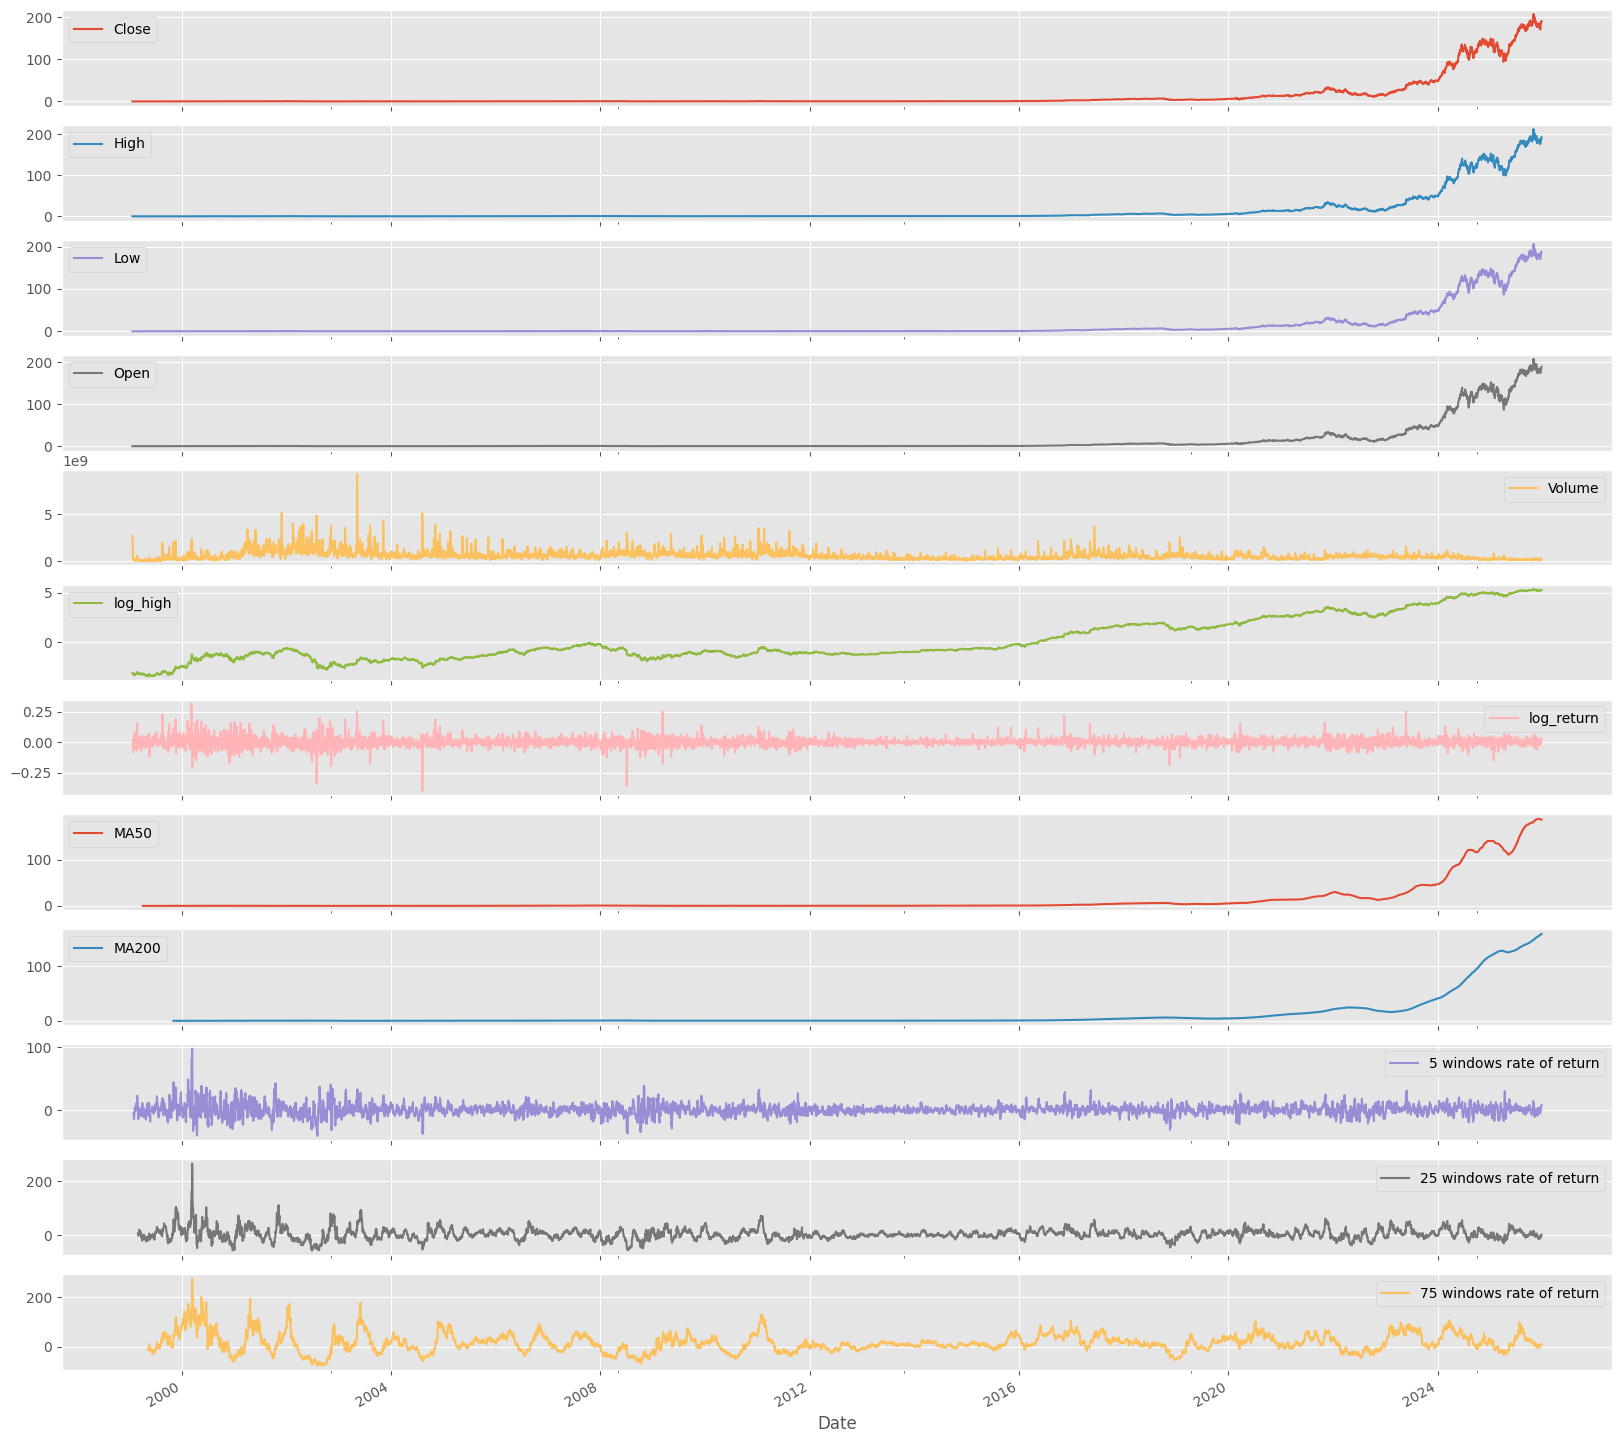

In [ ]:
df['1999':'2025'].plot(subplots = True, figsize = (20,20))
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

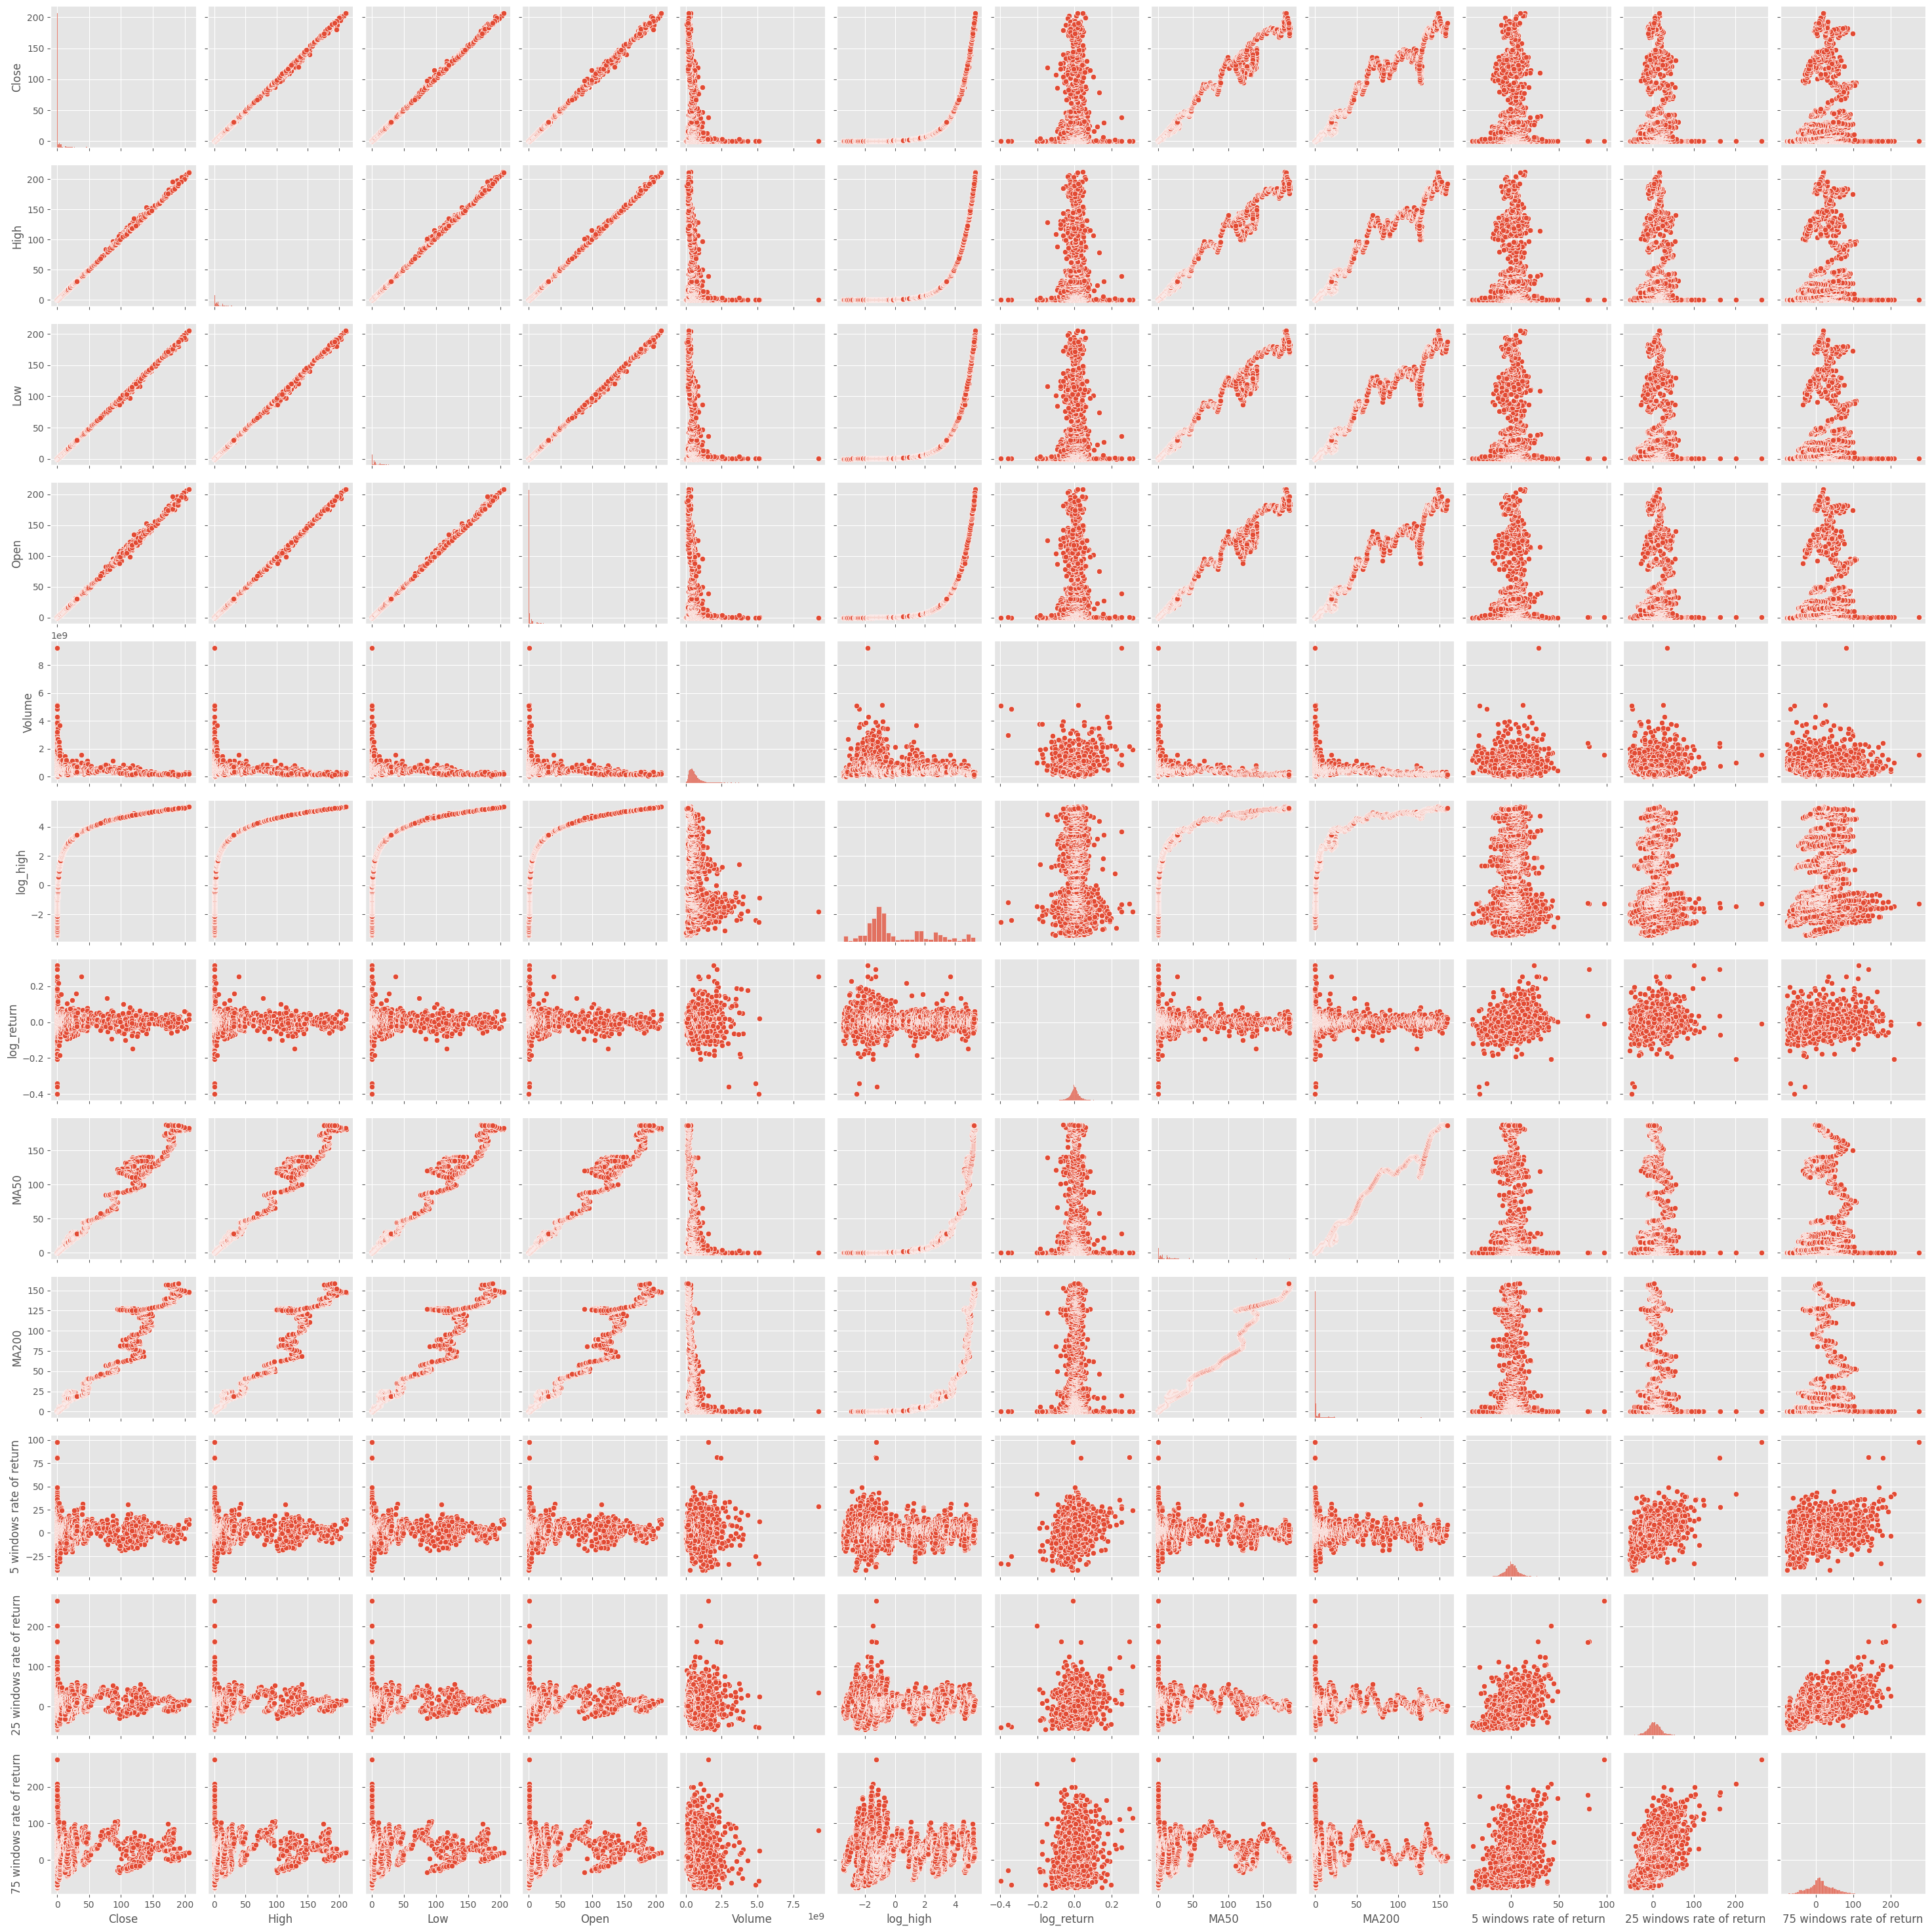

In [ ]:
sns.pairplot(df, palette = 'winter')

In [ ]:
# Install the 'arch' library
!pip install arch

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from arch import arch_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 14.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Re-loading and preprocessing df to ensure it's defined
df = pd.read_excel('Nvidia_stock_data.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

df['log_high'] = np.log(df['High'])
df['log_return'] = df['log_high'].diff()
returns = df['log_return'].dropna()

adf_test = adfuller(returns)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

ADF Statistic: -29.63799927416425
p-value: 0.0


In [ ]:
lb_test = acorr_ljungbox(returns**2, lags=[10], return_df=True)
print(lb_test)


       lb_stat     lb_pvalue
10  358.877053  5.200255e-71


In [ ]:
garch11 = arch_model(
    returns,
    mean='Constant',
    vol='GARCH',
    p=1,
    q=1,
    dist='normal'
)

garch_result = garch11.fit(update_freq=5)
print(garch_result.summary())


Optimization terminated successfully    (Exit mode 0)
            Current function value: -14270.313961949736
            Iterations: 8
            Function evaluations: 45
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                14270.3
Distribution:                  Normal   AIC:                          -28532.6
Method:            Maximum Likelihood   BIC:                          -28505.3
                                        No. Observations:                 6774
Date:                Mon, Jan 12 2026   Df Residuals:                     6773
Time:                        03:23:42   Df Model:                            1
                                 Mean Model                                 
   

/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001094. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)


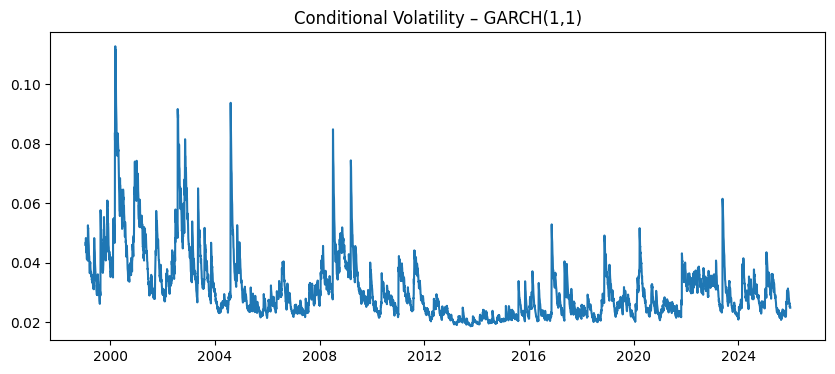

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(garch_result.conditional_volatility)
plt.title("Conditional Volatility – GARCH(1,1)")
plt.show()


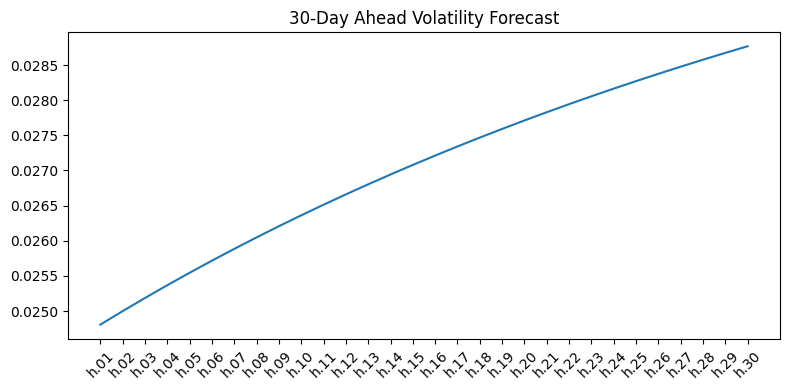

In [ ]:
forecast = garch_result.forecast(horizon=30)
vol_forecast = np.sqrt(forecast.variance.iloc[-1])

plt.figure(figsize=(8,4))
plt.plot(vol_forecast)
plt.title("30-Day Ahead Volatility Forecast")

days = vol_forecast.index # Define 'days' using the index of vol_forecast
plt.xticks(days, rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
garch_t = arch_model(
    returns,
    mean='Constant',
    vol='GARCH',
    p=1,
    q=1,
    dist='t'
)

garch_t_result = garch_t.fit()
print(garch_t_result.summary())


/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001094. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)
/tmp/ipython-input-1972784094.py:10: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  garch_t_result = garch_t.fit()


Iteration:      1,   Func. Count:      7,   Neg. LLF: 338386.11210949754
Iteration:      2,   Func. Count:     23,   Neg. LLF: 28022816.19645928
Iteration:      3,   Func. Count:     39,   Neg. LLF: 139253.9910621168
Iteration:      4,   Func. Count:     45,   Neg. LLF: 172136.09404671215
Iteration:      5,   Func. Count:     54,   Neg. LLF: 134764.48756098686
Iteration:      6,   Func. Count:     60,   Neg. LLF: 134615.7545956155
Iteration:      7,   Func. Count:     66,   Neg. LLF: 134614.81119278882
Iteration:      8,   Func. Count:     72,   Neg. LLF: 134614.74572142927
Iteration:      9,   Func. Count:     78,   Neg. LLF: 134614.74494971702
Iteration:     10,   Func. Count:     84,   Neg. LLF: 134614.73909096356
Iteration:     11,   Func. Count:     90,   Neg. LLF: 134614.7077783342
Iteration:     12,   Func. Count:     96,   Neg. LLF: 134614.54212023952
Iteration:     13,   Func. Count:    102,   Neg. LLF: 134613.68833165418
Iteration:     14,   Func. Count:    108,   Neg. LLF: 1

In [ ]:
gjr = arch_model(
    returns,
    mean='Constant',
    vol='GARCH',
    p=1,
    o=1,
    q=1,
    dist='t'
)

gjr_result = gjr.fit()
print(gjr_result.summary())


/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001094. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)
/tmp/ipython-input-408405117.py:11: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  gjr_result = gjr.fit()


Iteration:      1,   Func. Count:      8,   Neg. LLF: 148691.10500049754
Iteration:      2,   Func. Count:     25,   Neg. LLF: 17437577.67891831
Iteration:      3,   Func. Count:     42,   Neg. LLF: 74205.5292166661
Iteration:      4,   Func. Count:     50,   Neg. LLF: 73712.6493321154
Iteration:      5,   Func. Count:     58,   Neg. LLF: 124151.1267432282
Iteration:      6,   Func. Count:     66,   Neg. LLF: 3634460.029475478
Iteration:      7,   Func. Count:     76,   Neg. LLF: 25721.12885305452
Iteration:      8,   Func. Count:     84,   Neg. LLF: 26575.508761609264
Iteration:      9,   Func. Count:     96,   Neg. LLF: 397394.0269490868
Iteration:     10,   Func. Count:    113,   Neg. LLF: 61468.62092759238
Iteration:     11,   Func. Count:    121,   Neg. LLF: 69266.49950017624
Iteration:     12,   Func. Count:    129,   Neg. LLF: 787085.1532821311
Iteration:     13,   Func. Count:    137,   Neg. LLF: 432627.65611261467
Iteration:     14,   Func. Count:    145,   Neg. LLF: 141133.42

In [ ]:
print("GARCH Normal AIC:", garch_result.aic)
print("GARCH t AIC:", garch_t_result.aic)
print("GJR-GARCH AIC:", gjr_result.aic)


GARCH Normal AIC: -28532.627923899472
GARCH t AIC: -25830.989372183558
GJR-GARCH AIC: 1410720.610141044
